
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

RANDOM_STATE = 17

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [4]:
my_data.head()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6


In [6]:
my_data.shape

(22, 5)

In [7]:
my_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
count,22.00,22.00,22.00,22.00,22.00
mean,6.00,0.41,69.73,156.82,12.50
std,0.00,0.67,7.18,66.00,6.49
min,6.00,0.00,53.00,50.00,2.00
25%,6.00,0.00,67.00,100.00,7.25
50%,6.00,0.00,70.00,200.00,12.50
75%,6.00,1.00,75.00,200.00,17.75
max,6.00,2.00,81.00,200.00,23.00


In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Number of O-rings at risk on a given flight  22 non-null     int64
 1   Number experiencing thermal distress         22 non-null     int64
 2   Launch temperature (degrees F)               22 non-null     int64
 3   Leak-check pressure (psi)                    22 non-null     int64
 4   Temporal order of flight                     22 non-null     int64
dtypes: int64(5)
memory usage: 1008.0 bytes


In [9]:
columnas = list(my_data.columns.values)
for column in columnas:
  frecuencia= my_data[column].value_counts()
  print(frecuencia)
  print("===========================================")

6    22
Name: Number of O-rings at risk on a given flight, dtype: int64
0    15
1     5
2     2
Name: Number experiencing thermal distress, dtype: int64
70    4
67    3
76    2
75    2
63    1
58    1
57    1
53    1
81    1
79    1
78    1
73    1
72    1
69    1
68    1
Name: Launch temperature (degrees F), dtype: int64
200    15
50      5
100     2
Name: Leak-check pressure (psi), dtype: int64
23    1
22    1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
2     1
Name: Temporal order of flight, dtype: int64


In [10]:
#Determinar nulos en las variables de entrada
my_data.isnull().sum()

Number of O-rings at risk on a given flight    0
Number experiencing thermal distress           0
Launch temperature (degrees F)                 0
Leak-check pressure (psi)                      0
Temporal order of flight                       0
dtype: int64

c:\Users\yessrandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


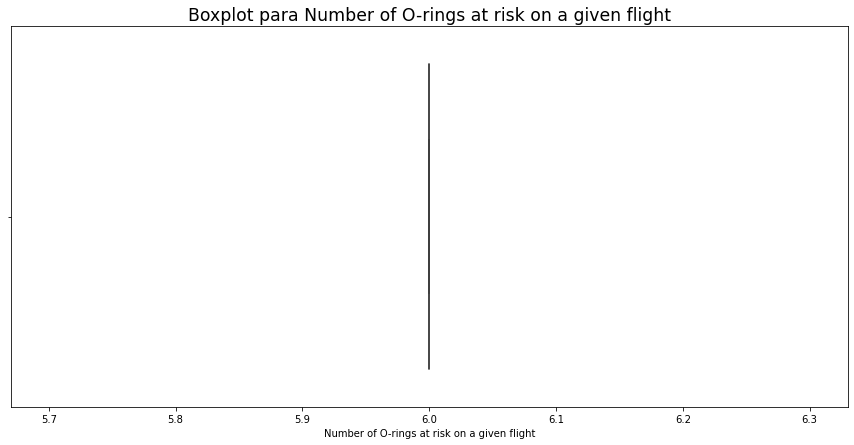

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(my_data["Number of O-rings at risk on a given flight"])
plt.title('Boxplot para Number of O-rings at risk on a given flight', fontsize='xx-large');
plt.show()

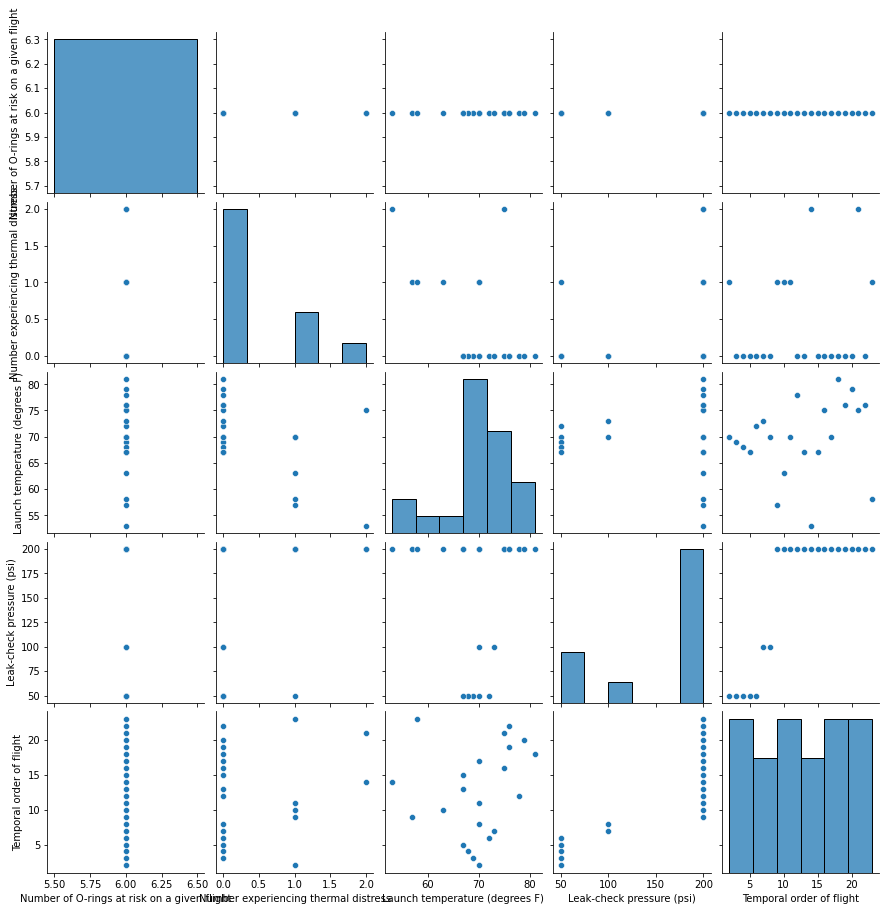

In [14]:
sns.pairplot(my_data)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [3]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor